# Imports

In [50]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Data loading

In [27]:
dataset = load_iris()
data = pd.DataFrame(dataset['data'], columns=["Petal Length","Petal Width", "Sepal Length","Sepal Width"])
data['Species'] = dataset['target']
data['Species'] = data ['Species'].apply(lambda x: dataset['target_names'][x])
data.head()

,Petal Length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
data.describe()

,Petal Length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Petal Length    150 non-null float64
Petal Width     150 non-null float64
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Petal Length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

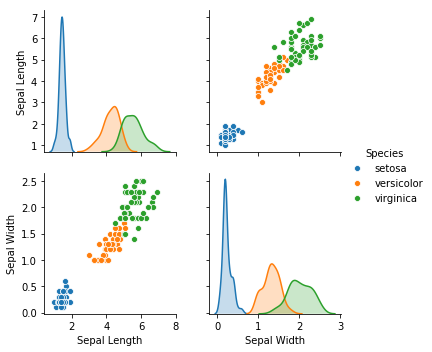

In [30]:
sns.pairplot(data, vars = ['Sepal Length', 'Sepal Width'], hue = 'Species')

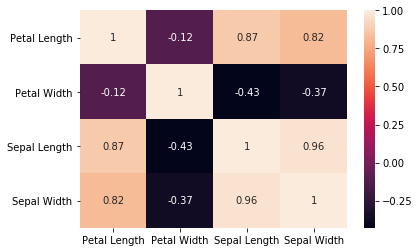

In [31]:
sns.heatmap(data.corr(),annot=True)

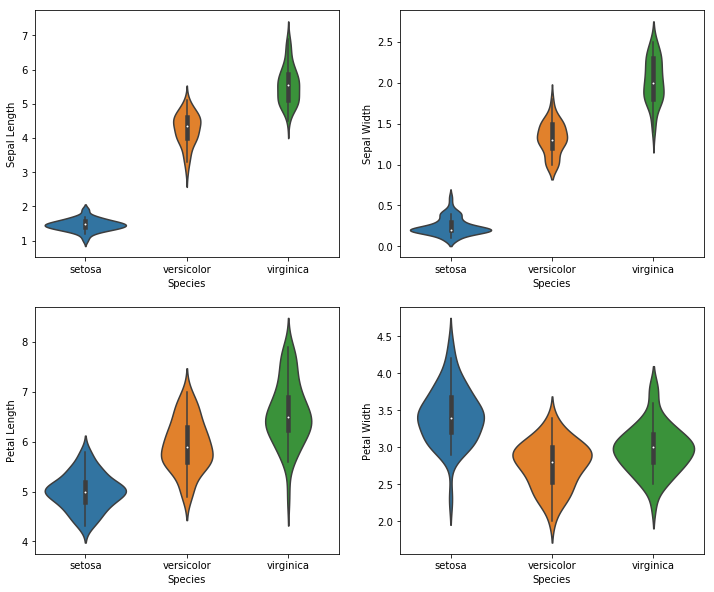

In [37]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)
sns.violinplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)
sns.violinplot(x="Species",y="Petal Length",data=data)
plt.subplot(2,2,4)
sns.violinplot(x="Species",y="Petal Width",data=data)

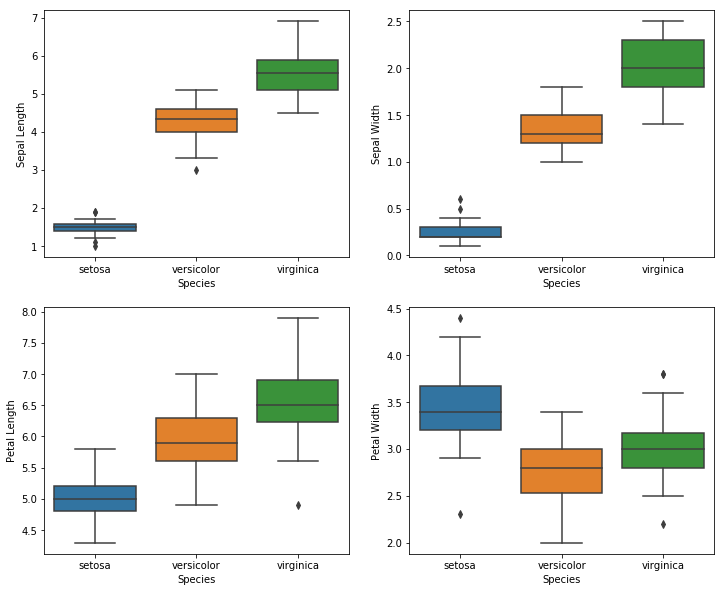

In [38]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="Petal Length",data=data)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="Petal Width",data=data)

# Classification Model

In [48]:
X = data.drop(['Species'], axis = 1)
Y = data['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [62]:
# Test options and evaluation metric
kfold = StratifiedKFold(n_splits=10, random_state=1)
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.958974 (0.066814)
LDA: 0.983333 (0.033333)
KNN: 0.983333 (0.033333)
CART: 0.958333 (0.055902)
NB: 0.975000 (0.038188)
SVM: 0.983333 (0.033333)


In [74]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [75]:
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9666666666666667
[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [77]:
cm = confusion_matrix(Y_test, predictions)

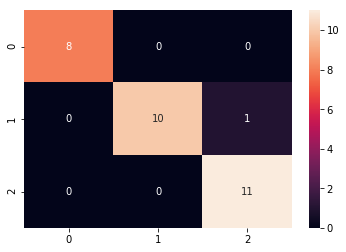

In [78]:
sns.heatmap(cm, annot = True)